<a href="https://colab.research.google.com/github/Putra1688/MachineLearning-2025-22/blob/main/TG7_2341720248_Rangga_Dwi_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍉 JS06 - Regresi**

# **🍇TUGAS PRAKTIKUM**

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/JS06 - Regresi/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Pra-pemrosesan Data (Encoding Variabel Kategorikal)

In [3]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
print(df_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


## 1| Identifikasi Variabel Bebas (X) dan Variabel Target (y)





In [4]:
# Variabel Target (y): 'charges'
y = df_encoded['charges']

# Variabel Bebas (X): Semua kolom kecuali 'charges'
X = df_encoded.drop('charges', axis=1)

print("\n--- Variabel Bebas (X) & Target (y) ---")
print(f"Bentuk X (Fitur): {X.shape}")
print(f"Bentuk y (Target): {y.shape}")
print(f"Fitur yang digunakan: {list(X.columns)}")


--- 2. Variabel Bebas (X) & Target (y) ---
Bentuk X (Fitur): (1338, 8)
Bentuk y (Target): (1338,)
Fitur yang digunakan: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


## 2| Pembagian Dataset (Train dan Test)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUkuran Data Latih (Train): {X_train.shape[0]} baris")
print(f"Ukuran Data Uji (Test): {X_test.shape[0]} baris")


Ukuran Data Latih (Train): 1070 baris
Ukuran Data Uji (Test): 268 baris


## 4| Model Multiple Linear Regression

In [6]:
# Inisialisasi model
model = LinearRegression()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

## 6| Evaluasi Model

In [7]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n" + "="*50)
print("             HASIL EVALUASI MODEL REGRESI")
print("="*50)
print(f"R-squared (R²):           {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("="*50)


             HASIL EVALUASI MODEL REGRESI
R-squared (R²):           0.7836
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19


## Visualisasi (Scatter Plot Prediksi vs. Aktual)

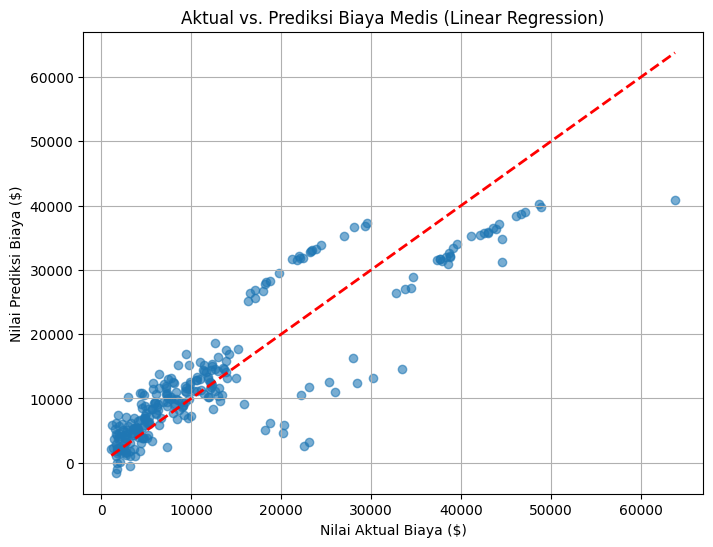

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
# Tambahkan garis diagonal untuk prediksi sempurna
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual Biaya ($)')
plt.ylabel('Nilai Prediksi Biaya ($)')
plt.title('Aktual vs. Prediksi Biaya Medis (Linear Regression)')
plt.grid(True)
plt.show()

## Analisis Koefisien

In [11]:
# Koefisien menunjukkan seberapa besar pengaruh setiap fitur terhadap 'charges'
koefisien = pd.DataFrame({'Fitur': X.columns, 'Koefisien': model.coef_})
print("\n--- Koefisien Regresi (Pengaruh Fitur terhadap Biaya) ---")
print(koefisien.sort_values(by='Koefisien', ascending=False))


--- Koefisien Regresi (Pengaruh Fitur terhadap Biaya) ---
              Fitur     Koefisien
4        smoker_yes  23651.128856
2          children    425.278784
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354
